In [2]:
import pandas as pd
import os
__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'scripts\\data\\dogodki50_spucano_vse_kategorije.csv')
df = pd.read_csv(input_file, header = 0)
df.head()

,naziv,opis,datum_od,stevilo,sifra_prizorisca,kategorije_sifre,kategorije_nazivi,veselica,nazivpp,opispp,kategorije_sifre_new,kategorije_nazivi_new
0,K4 x Ambientalno: Josh Tweek (The Ghost),Dan pred težko pričakovanim K4x4 večerom bomo ...,2020-02-20 18:00:00,281,1.267000e+14,25,Art,0,ambientalen josh tweek ghost,dan težko pričakovan večer sezona šestič zaleb...,25,Art
1,"Fem. seminar: Feminizem, nacionalizem in družb...",Na predavanju bomo predstavile študijo Sare R....,2020-02-04 19:30:00,300,1.486186e+15,"16,32","Kid Friendly,Causes",0,fem seminar feminizem nacionalizem družben rep...,predavanje predstaviti študija sara farris nas...,32,Causes
2,BALKAN x TRAP Night / 21.2.2020 / Max Klub,Februarja se znova vračamo... \n\nV MAX Klubu ...,2020-02-21 22:00:00,501,2.346167e+14,15,Party,0,balkan trap night max klub,februar znova vračati max klub nadaljevati del...,15,Party
3,Na drugi strani sonca (PRESTAVLJENO!),Vabljeni na jazz večer Na drugi strani sonca s...,2020-03-13 19:00:00,221,1.118588e+14,2,Music,0,stran sonce prestavljen,vabljen jazz večer stran sonce skupina chavesa...,2,Music
4,Medštudijski kongres: (R)evolucija bakterij,? Bakterije povzročijo v Evropski uniji 250000...,2020-03-07 09:00:00,1519,1.104668e+15,5,Other,0,medštudijski kongres evolucija bakterija,bakterija povzročiti evropski unija smrt leto ...,5,Other


In [3]:
df = df[pd.notnull(df['opispp'])]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8009
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   naziv                  8010 non-null   object 
 1   opis                   8010 non-null   object 
 2   datum_od               8010 non-null   object 
 3   stevilo                8010 non-null   int64  
 4   sifra_prizorisca       7999 non-null   float64
 5   kategorije_sifre       8010 non-null   object 
 6   kategorije_nazivi      8010 non-null   object 
 7   veselica               8010 non-null   int64  
 8   nazivpp                7995 non-null   object 
 9   opispp                 8010 non-null   object 
 10  kategorije_sifre_new   8010 non-null   int64  
 11  kategorije_nazivi_new  8010 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 813.5+ KB


In [5]:
col = ['kategorije_nazivi_new', 'opispp']
df['kategorije_nazivi_new'].replace({'Art': 'Umetnost', 'Causes': 'Dobrodelno', 'Comedy': 'Komedija', 'Food': 'Hrana', 'Health': 'Zdravje', 'Music': 'Glasba', 'Other': 'Ostalo', 'Party': 'Zabava', 'Sports': 'Šport', 'Crafts': 'Obrtništvo', 'Dance': 'Ples', 'Drinks': 'Pijača', 'Fitness': 'Fitnes', 'Literature': 'Literatura', 'Networking': 'Mreženje', 'Theater': 'Gledališče', 'Wellness': 'Velnes'}, inplace=True)
df = df[col]

In [6]:
df.columns

Index(['kategorije_nazivi_new', 'opispp'], dtype='object')

In [7]:
df.columns = ['kategorije_nazivi_new', 'opispp']

In [8]:
df['category_id'] = df['kategorije_nazivi_new'].factorize()[0]
from io import StringIO
category_id_df = df[['kategorije_nazivi_new', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'kategorije_nazivi_new']].values)

In [9]:
df.head()

,kategorije_nazivi_new,opispp,category_id
0,Umetnost,dan težko pričakovan večer sezona šestič zaleb...,0
1,Dobrodelno,predavanje predstaviti študija sara farris nas...,1
2,Zabava,februar znova vračati max klub nadaljevati del...,2
3,Glasba,vabljen jazz večer stran sonce skupina chavesa...,3
4,Ostalo,bakterija povzročiti evropski unija smrt leto ...,4


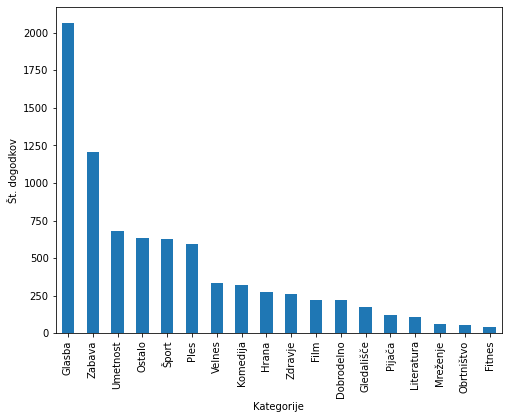

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('kategorije_nazivi_new').opispp.count().sort_values(ascending=False).plot.bar(ylim=0,)
plt.ylabel('Št. dogodkov')
plt.xlabel('Kategorije')
plt.show()